In [100]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, RepeatedKFold, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score
%matplotlib inline

#Data Preprocessing

In [102]:
data = pd.read_csv("/content/drive/MyDrive/datacar/cars_dataset-dellinspirion15.csv")
data.head()

,ID,mark,Box,Drive_unit,Seats,Doors,Country,Engine,Volume,Color,Mileage,Price,Year,Car_type,Generation,Drive,Boost_type,Cylinder_location,Front_brakes,Engine_volume,Width,Front_Suspension_type,Maximum_power,Length,Wheelbase,Cylinders,Height,Fuel,Torque,Volume_fuel_tank,Maximum_speed,Full_weight
0,0,Mercedes-Benz,automatic,full,5,5,German,diesel,2.9,black,0,12902800,2020,SUV,III (W463) 2018 – now,full,turbocharging,in-line,disc ventilated,2925.0,1931.0,"independent, spring",249,4817.0,2890.0,6.0,1969.0,diesel,0,75.0,199.0,3150.0
1,1,Mercedes-Benz,automatic,full,5,5,German,diesel,2.9,green,0,15709500,2020,SUV,III (W463) 2018 – now,full,turbocharging,in-line,disc ventilated,2925.0,1931.0,"independent, spring",330,4817.0,2890.0,6.0,1969.0,diesel,700,75.0,210.0,3150.0
2,2,Mercedes-Benz,automatic,full,5,5,German,gasoline,4.0,black,15500,13890000,2019,SUV,III (W463) 2018 – now,full,turbocharging,V-type,disc ventilated,3982.0,1931.0,"independent, spring",422,4817.0,2890.0,8.0,1969.0,AI-95,610,75.0,210.0,3150.0
3,3,Mercedes-Benz,automatic,full,5,5,German,gasoline,4.0,black,0,13116000,2020,SUV,III (W463) 2018 – now,full,turbocharging,V-type,disc ventilated,3982.0,1931.0,"independent, spring",422,4817.0,2890.0,8.0,1969.0,AI-95,610,75.0,210.0,3150.0
4,4,Mercedes-Benz,automatic,full,5,5,German,gasoline,4.0,gray,15297,11450000,2019,SUV,III (W463) 2018 – now,full,turbocharging,V-type,disc ventilated,3982.0,1931.0,"independent, spring",422,4817.0,2890.0,8.0,1969.0,AI-95,610,75.0,210.0,3150.0


In [103]:
data=data.drop('ID',axis=1)
data.head()

,mark,Box,Drive_unit,Seats,Doors,Country,Engine,Volume,Color,Mileage,Price,Year,Car_type,Generation,Drive,Boost_type,Cylinder_location,Front_brakes,Engine_volume,Width,Front_Suspension_type,Maximum_power,Length,Wheelbase,Cylinders,Height,Fuel,Torque,Volume_fuel_tank,Maximum_speed,Full_weight
0,Mercedes-Benz,automatic,full,5,5,German,diesel,2.9,black,0,12902800,2020,SUV,III (W463) 2018 – now,full,turbocharging,in-line,disc ventilated,2925.0,1931.0,"independent, spring",249,4817.0,2890.0,6.0,1969.0,diesel,0,75.0,199.0,3150.0
1,Mercedes-Benz,automatic,full,5,5,German,diesel,2.9,green,0,15709500,2020,SUV,III (W463) 2018 – now,full,turbocharging,in-line,disc ventilated,2925.0,1931.0,"independent, spring",330,4817.0,2890.0,6.0,1969.0,diesel,700,75.0,210.0,3150.0
2,Mercedes-Benz,automatic,full,5,5,German,gasoline,4.0,black,15500,13890000,2019,SUV,III (W463) 2018 – now,full,turbocharging,V-type,disc ventilated,3982.0,1931.0,"independent, spring",422,4817.0,2890.0,8.0,1969.0,AI-95,610,75.0,210.0,3150.0
3,Mercedes-Benz,automatic,full,5,5,German,gasoline,4.0,black,0,13116000,2020,SUV,III (W463) 2018 – now,full,turbocharging,V-type,disc ventilated,3982.0,1931.0,"independent, spring",422,4817.0,2890.0,8.0,1969.0,AI-95,610,75.0,210.0,3150.0
4,Mercedes-Benz,automatic,full,5,5,German,gasoline,4.0,gray,15297,11450000,2019,SUV,III (W463) 2018 – now,full,turbocharging,V-type,disc ventilated,3982.0,1931.0,"independent, spring",422,4817.0,2890.0,8.0,1969.0,AI-95,610,75.0,210.0,3150.0


In [104]:
data.shape

(22702, 31)

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22702 entries, 0 to 22701
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   mark                   22702 non-null  object 
 1   Box                    22702 non-null  object 
 2   Drive_unit             22702 non-null  object 
 3   Seats                  22702 non-null  int64  
 4   Doors                  22702 non-null  int64  
 5   Country                22702 non-null  object 
 6   Engine                 22702 non-null  object 
 7   Volume                 22702 non-null  float64
 8   Color                  22702 non-null  object 
 9   Mileage                22702 non-null  int64  
 10  Price                  22702 non-null  int64  
 11  Year                   22702 non-null  int64  
 12  Car_type               22702 non-null  object 
 13  Generation             22702 non-null  object 
 14  Drive                  22511 non-null  object 
 15  Bo

In [106]:
print(data.isnull().sum())

mark                       0
Box                        0
Drive_unit                 0
Seats                      0
Doors                      0
Country                    0
Engine                     0
Volume                     0
Color                      0
Mileage                    0
Price                      0
Year                       0
Car_type                   0
Generation                 0
Drive                    191
Boost_type               283
Cylinder_location        247
Front_brakes             191
Engine_volume              0
Width                      0
Front_Suspension_type    191
Maximum_power              0
Length                     0
Wheelbase                  0
Cylinders                  0
Height                     0
Fuel                     419
Torque                     0
Volume_fuel_tank           0
Maximum_speed              0
Full_weight                0
dtype: int64


In [107]:
mode_A = data['Drive'].mode()[0]
data['Drive'] = data['Drive'].fillna(mode_A)
mode_A = data['Boost_type'].mode()[0]
data['Boost_type'] = data['Boost_type'].fillna(mode_A)
mode_A = data['Cylinder_location'].mode()[0]
data['Cylinder_location'] = data['Cylinder_location'].fillna(mode_A)
mode_A = data['Front_brakes'].mode()[0]
data['Front_brakes'] = data['Front_brakes'].fillna(mode_A)
mode_A = data['Front_Suspension_type'].mode()[0]
data['Front_Suspension_type'] = data['Front_Suspension_type'].fillna(mode_A)
mode_A = data['Fuel'].mode()[0]
data['Fuel'] = data['Fuel'].fillna(mode_A)

In [108]:
print(data.isnull().sum())

mark                     0
Box                      0
Drive_unit               0
Seats                    0
Doors                    0
Country                  0
Engine                   0
Volume                   0
Color                    0
Mileage                  0
Price                    0
Year                     0
Car_type                 0
Generation               0
Drive                    0
Boost_type               0
Cylinder_location        0
Front_brakes             0
Engine_volume            0
Width                    0
Front_Suspension_type    0
Maximum_power            0
Length                   0
Wheelbase                0
Cylinders                0
Height                   0
Fuel                     0
Torque                   0
Volume_fuel_tank         0
Maximum_speed            0
Full_weight              0
dtype: int64


In [109]:
categorical_features = data.select_dtypes(include=['object', 'category']).columns.tolist()

print("Categorical features:", categorical_features)

Categorical features: ['mark', 'Box', 'Drive_unit', 'Country', 'Engine', 'Color', 'Car_type', 'Generation', 'Drive', 'Boost_type', 'Cylinder_location', 'Front_brakes', 'Front_Suspension_type', 'Fuel']


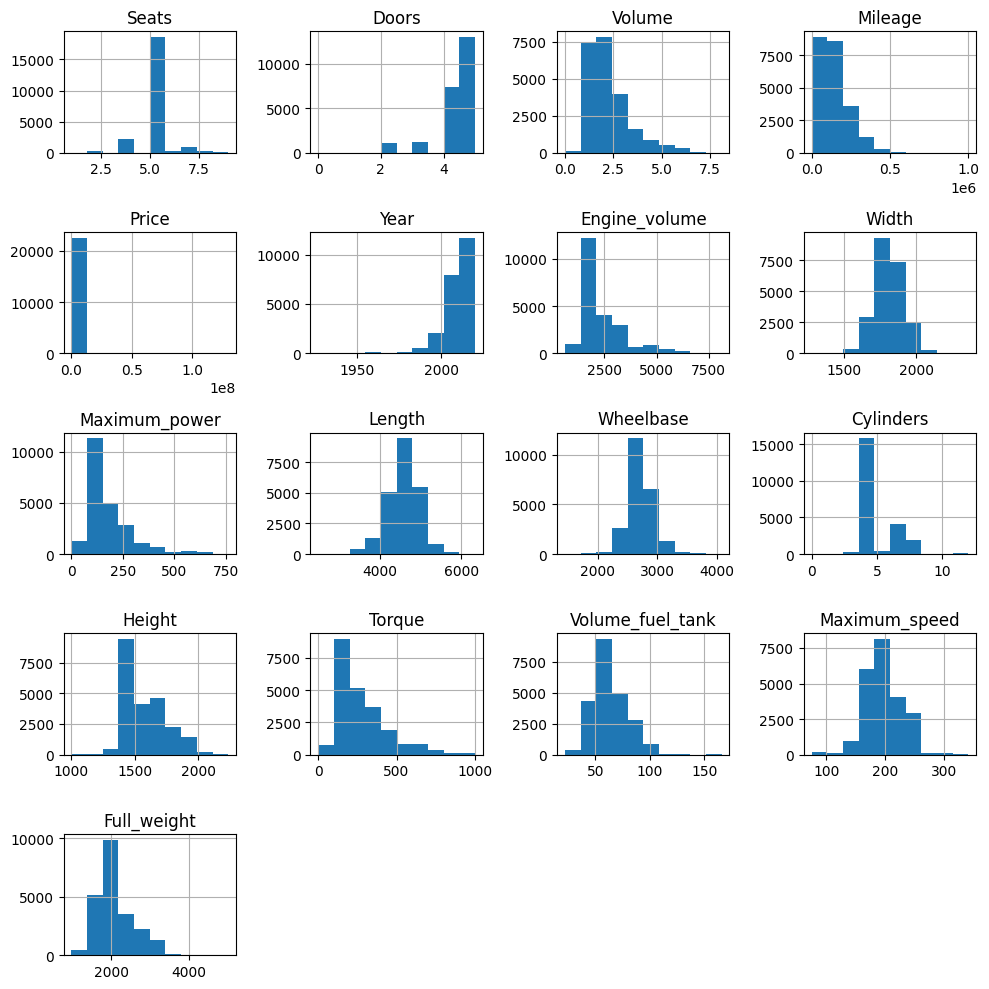

In [110]:
data.hist(figsize=(10,10))
plt.tight_layout()
plt.show()

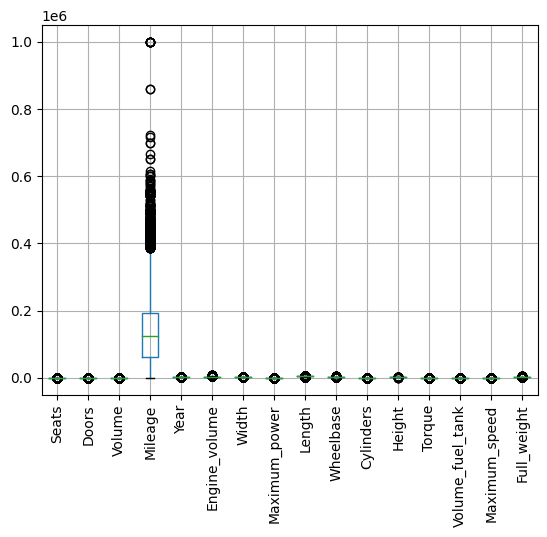

In [111]:
data_to_plot = data.drop(columns=['Price'],axis=1)
data_to_plot.boxplot(rot=90)
plt.show()

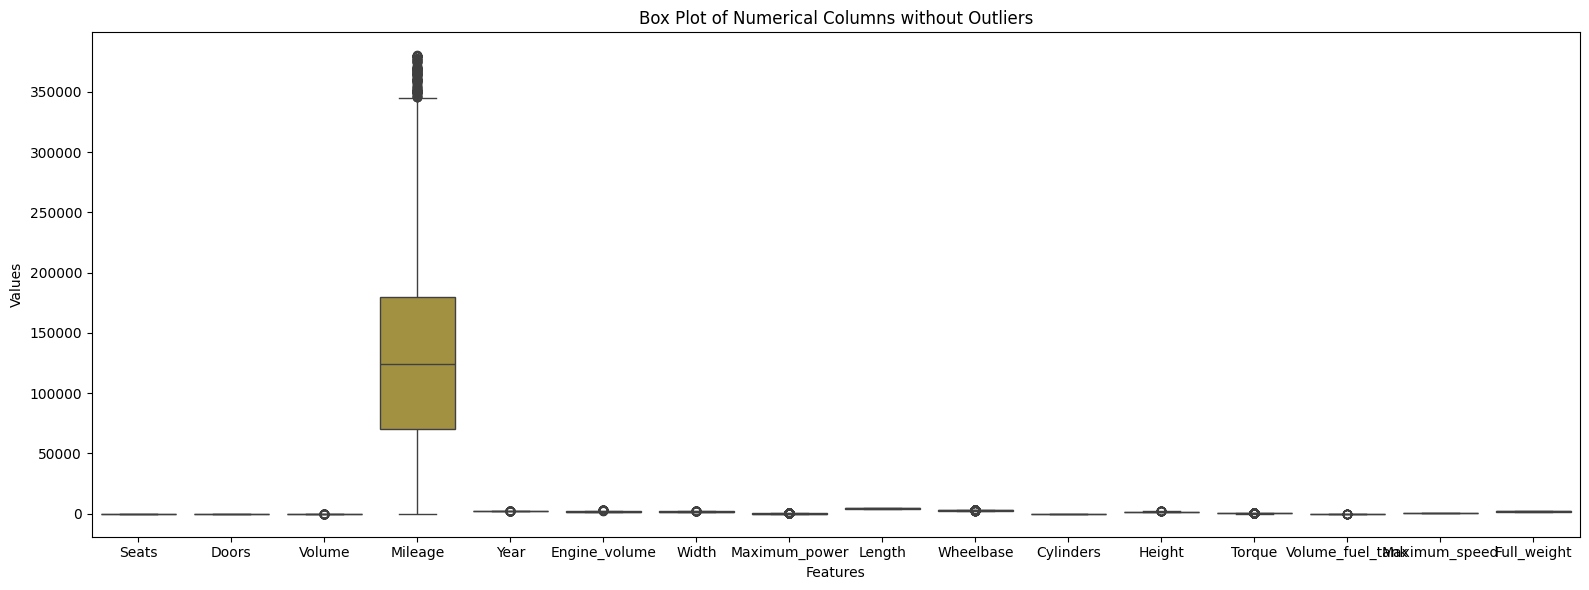

In [112]:
numerical_columns = data_to_plot.select_dtypes(include=[np.number]).columns
for col in numerical_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

plt.figure(figsize=(16, 6))
sns.boxplot(data=data[numerical_columns])
plt.title('Box Plot of Numerical Columns without Outliers')
plt.xlabel('Features')
plt.ylabel('Values')
plt.tight_layout()
plt.show()

In [113]:
data.shape

(11094, 31)

In [114]:
data.head()

,mark,Box,Drive_unit,Seats,Doors,Country,Engine,Volume,Color,Mileage,Price,Year,Car_type,Generation,Drive,Boost_type,Cylinder_location,Front_brakes,Engine_volume,Width,Front_Suspension_type,Maximum_power,Length,Wheelbase,Cylinders,Height,Fuel,Torque,Volume_fuel_tank,Maximum_speed,Full_weight
12,Mercedes-Benz,automatic,full,5,5,German,gasoline,2.0,blue,0,3470400,2020,SUV,I (X253) Restyling 2019 – now,full,turbocharging,in-line,disc ventilated,1991.0,1890.0,"independent, spring",197,4655.0,2873.0,4.0,1644.0,AI-95,320,50.0,215.0,2118.954231
13,Mercedes-Benz,automatic,full,5,5,German,gasoline,2.0,white,4300,3590000,2020,SUV,I (X253) Restyling 2019 – now,full,turbocharging,in-line,disc ventilated,1991.0,1890.0,"independent, spring",197,4655.0,2873.0,4.0,1644.0,AI-95,320,50.0,215.0,2118.954231
65,Mitsubishi,variator,front,5,5,Japan,gasoline,2.0,white,0,1584000,2020,SUV,III Restyling 3 2018 – now,front,no,in-line,disc ventilated,1998.0,1810.0,"independent, spring",146,4695.0,2670.0,4.0,1703.0,AI-92,196,60.0,193.0,1985.000000
66,Mitsubishi,variator,full,5,5,Japan,gasoline,2.0,white,0,1519000,2020,SUV,III Restyling 3 2018 – now,full,no,in-line,disc ventilated,1998.0,1810.0,"independent, spring",146,4695.0,2670.0,4.0,1703.0,AI-92,196,60.0,188.0,2060.000000
67,Mitsubishi,variator,front,5,5,Japan,gasoline,2.0,black,0,1830000,2020,SUV,III Restyling 3 2018 – now,front,no,in-line,disc ventilated,1998.0,1810.0,"independent, spring",146,4695.0,2670.0,4.0,1703.0,AI-92,196,60.0,193.0,1985.000000


In [115]:
object_cols = data.select_dtypes(include=['object']).columns.tolist()
unique_counts = {col: data[col].nunique() for col in object_cols}
print(unique_counts)

{'mark': 61, 'Box': 4, 'Drive_unit': 3, 'Country': 16, 'Engine': 4, 'Color': 15, 'Car_type': 7, 'Generation': 582, 'Drive': 3, 'Boost_type': 3, 'Cylinder_location': 2, 'Front_brakes': 3, 'Front_Suspension_type': 3, 'Fuel': 7}


In [116]:
data.shape

(11094, 31)

In [117]:
value_counts = data['mark'].value_counts()
data = data[data['mark'].map(value_counts) >= 30]
value_counts = data['Country'].value_counts()
data = data[data['Country'].map(value_counts) >= 50]

In [118]:
# onehot: Engine, cylinder_location
# ordinal: front_brakes,

In [119]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

front_brakes_order = ['disc ventilated','disc','drum']
car_type_order = ['SUV', 'Minivan', 'Station Wagon', 'Sedan', 'Liftback', 'Compact MPV', 'Hatchback']

oe = OrdinalEncoder(categories=[front_brakes_order])
oe1 = OrdinalEncoder(categories=[car_type_order])

data['Front_brakes'] = oe.fit_transform(data[['Front_brakes']])
data['Car_type'] = oe1.fit_transform(data[['Car_type']])

In [120]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
columns=["Engine","Cylinder_location"]
data=pd.get_dummies(data,columns=columns)

In [121]:
data.shape

(10766, 35)

In [122]:
object_columns = data.select_dtypes(include=['object']).columns

for column in object_columns:
    unique_values = data[column].unique()
    print(f"{column} : {unique_values}")

mark : ['Mercedes-Benz ' 'Mitsubishi ' 'Nissan ' 'Audi ' 'Skoda ' 'Haval '
 'Renault ' 'LADA (VAZ) ' 'Volvo ' 'Toyota ' 'BMW ' 'Hyundai ' 'Suzuki '
 'Citroen ' 'Volkswagen ' 'Peugeot ' 'Changan ' 'Chevrolet ' 'Jeep '
 'Lexus ' 'Subaru ' 'Honda ' 'Mazda ' 'Ford ' 'Kia ' 'Dodge ' 'Opel '
 'Geely ' 'Chery ' 'Great Wall ' 'SsangYong ' 'Fiat ' 'Datsun ' 'Daewoo '
 'Lifan ' 'Ravon ' 'Vortex ' 'GAZ ' 'Saab ']
Box : ['automatic' 'variator' 'mechanics' 'robot']
Drive_unit : ['full' 'front' 'rear']
Country : ['German' 'Japan' 'Czech Republic' 'China' 'France' 'Russia' 'Sweden'
 'South Korea' 'USA' 'Italy' 'Uzbekistan']
Color : ['blue' 'white' 'black' 'silver' 'brown' 'gray' 'light Blue' 'red' 'green'
 'beige' 'yellow' 'orange' 'gold' 'magenta' 'purple']
Generation : ['I (X253) Restyling 2019 – now ' 'III Restyling 3 2018 – now '
 'II Restyling 2017 – now ' 'V (B9) Restyling 2019 – now '
 'III Restyling 2017 – now ' 'I 2017 – now ' 'i 2019 – now '
 'V (W213, S213, C238) Restyling 2020 – now '
 'I

In [123]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

data['Drive'] = label_encoder.fit_transform(data['Drive'])
data['Boost_type'] = label_encoder.fit_transform(data['Boost_type'])
data['Country'] = label_encoder.fit_transform(data['Country'])
data['Fuel'] = label_encoder.fit_transform(data['Fuel'])
data['Drive_unit'] = label_encoder.fit_transform(data['Drive_unit'])
data['Front_Suspension_type'] = label_encoder.fit_transform(data['Front_Suspension_type'])
data['mark'] = label_encoder.fit_transform(data['mark'])
data['Box'] = label_encoder.fit_transform(data['Box'])
data['Color'] = label_encoder.fit_transform(data['Color'])
data['mark'] = label_encoder.fit_transform(data['mark'])
data['Box'] = label_encoder.fit_transform(data['Box'])

data.drop(["Generation"], axis=1, inplace=True)

In [124]:
categorical_features = data.select_dtypes(include=['object', 'category']).columns.tolist()

print("Categorical features:", categorical_features)

Categorical features: []


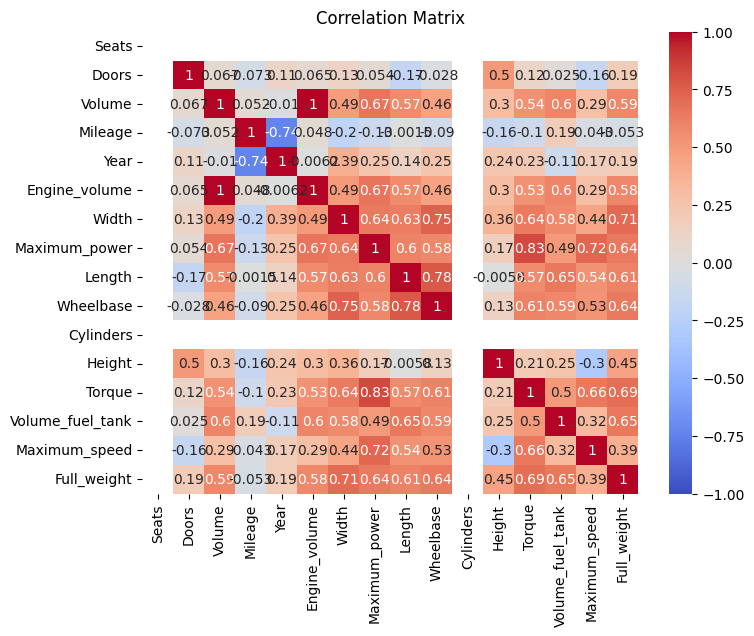

In [125]:
correlation_matrix = data[numerical_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [126]:
data.shape

(10766, 34)

In [127]:
X = data.drop(['Price'], axis=1)
y = data['Price']

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [129]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##Linear Regression

In [130]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lg = lr.predict(X_test_scaled)

In [131]:
r2 = r2_score(y_test, y_pred_lg)
print(r2)

0.7330075602622164


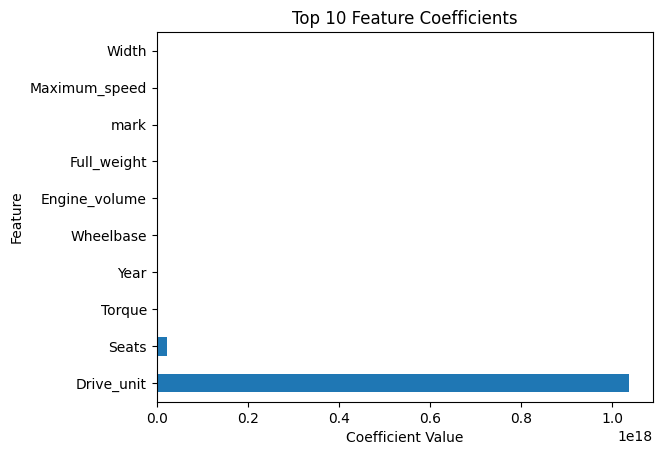

In [132]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
coefficients = pd.Series(model.coef_, index=X_train.columns)
coefficients.nlargest(10).plot(kind='barh')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 10 Feature Coefficients')
plt.show()

##KNN

In [133]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_kn = knn.predict(X_test_scaled)

In [134]:
r2 = r2_score(y_test, y_pred_kn)
print(f'R^2 Score: {r2}')

R^2 Score: 0.9201325830767295


In [135]:
k_values = range(1, 21)

r2_values = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_kn = knn.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred_kn)
    r2_values.append(r2)

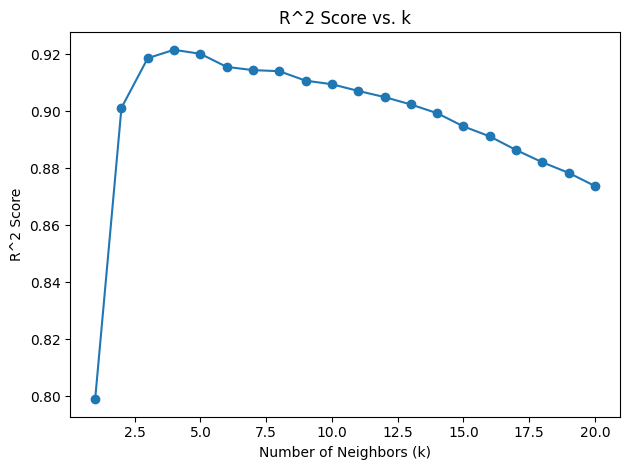

In [136]:
plt.plot(k_values, r2_values, marker='o')
plt.title('R^2 Score vs. k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('R^2 Score')
plt.tight_layout()
plt.show()

###Random Forest

In [137]:
from sklearn.ensemble import RandomForestRegressor

In [138]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_scaled, y_train)
y_pred_rf = rf_regressor.predict(X_test_scaled)

In [139]:
r2 = r2_score(y_test, y_pred_rf)
print("R^2 Score:", r2)

R^2 Score: 0.9545548117515844


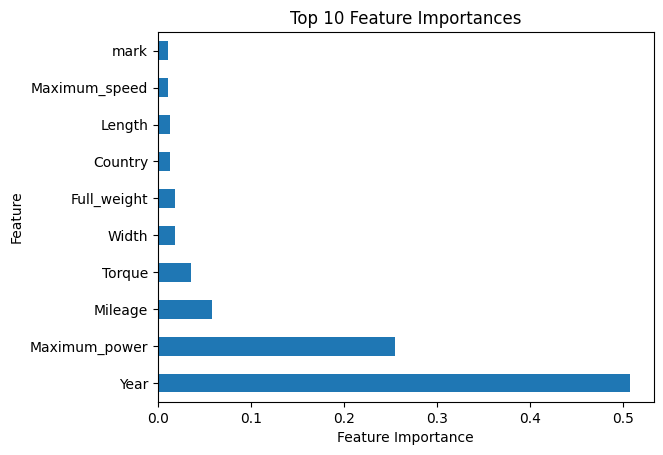

In [140]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_scaled, y_train)
feature_importances = pd.Series(rf_regressor.feature_importances_, index=X_train.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances')
plt.show()

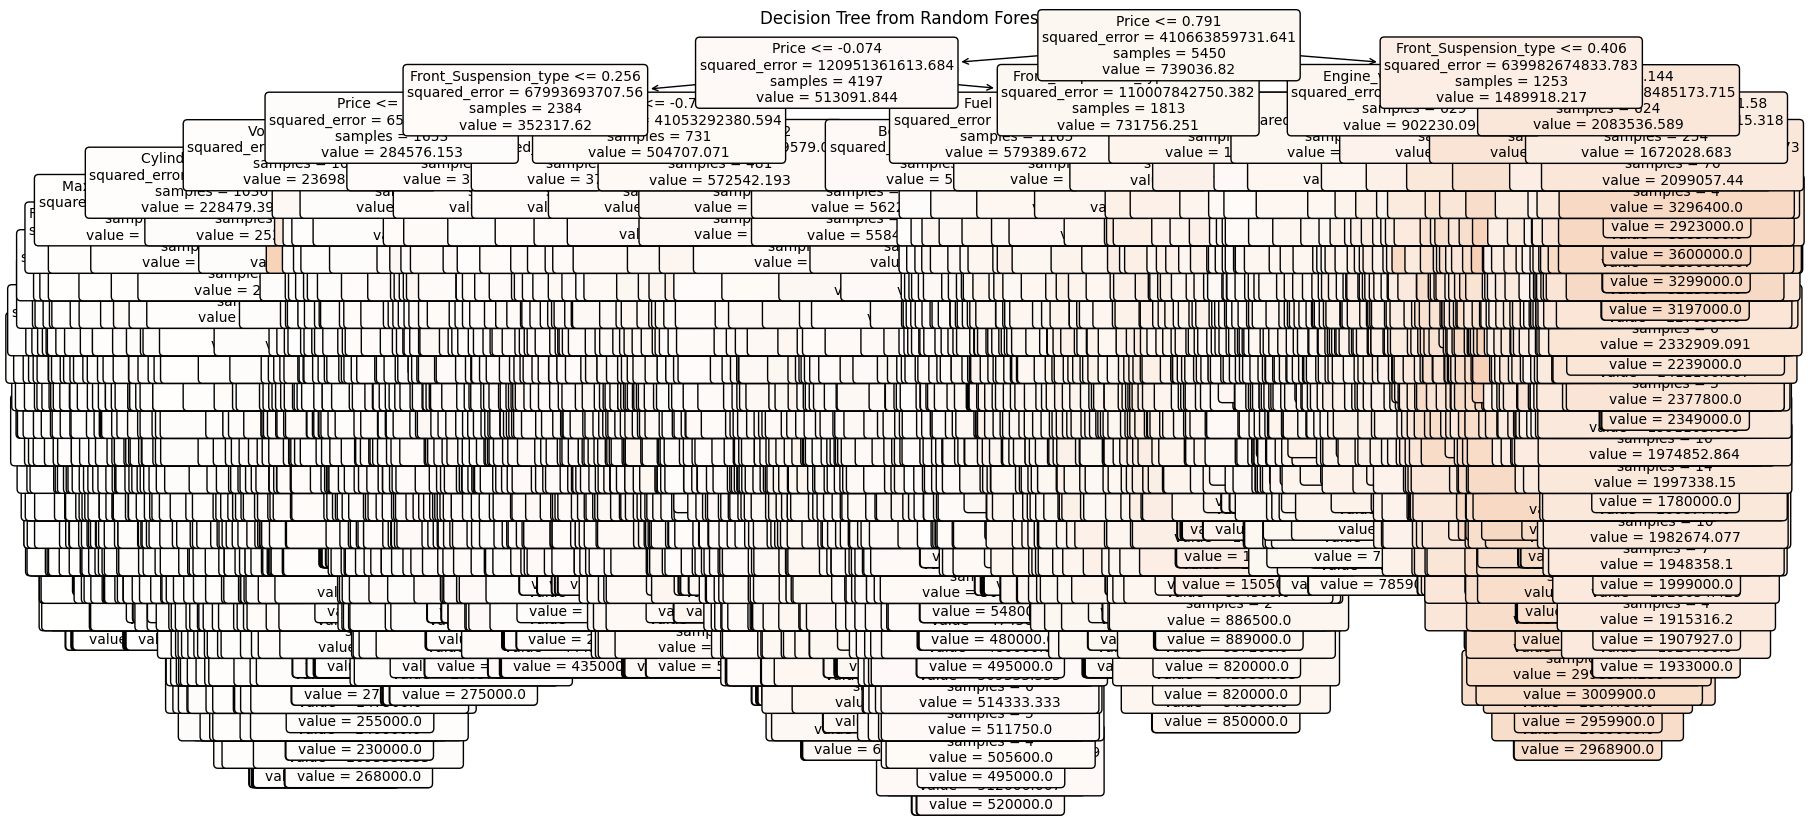

In [141]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
tree_to_plot = rf_regressor.estimators_[0]
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=data.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()

###SVR

In [142]:
from sklearn.svm import SVR

In [143]:
SVR_model = SVR(kernel='linear')
SVR_model.fit(X_train_scaled, y_train)
y_pred_svr = SVR_model.predict(X_test_scaled)

In [144]:
r2 = r2_score(y_test, y_pred_svr)
print("R^2 Score:", r2)

R^2 Score: -0.01815001613266687


In [145]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.1, 0.2, 0.5, 1],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

results = []
for C in param_grid['C']:
    for epsilon in param_grid['epsilon']:
        for kernel in param_grid['kernel']:
            svr = SVR(C=C, epsilon=epsilon, kernel=kernel)
            svr.fit(X_train_scaled, y_train)
            y_pred = svr.predict(X_test_scaled)
            r2 = r2_score(y_test, y_pred)
            results.append((C, epsilon, kernel, r2))

In [146]:
results_df = pd.DataFrame(results, columns=['C', 'epsilon', 'kernel', 'R^2 Score'])
results_df.sort_values(by='R^2 Score', ascending=False, inplace=True)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print(results_df)

        C  epsilon   kernel  R^2 Score
60  100.0      1.0   linear   0.609139
56  100.0      0.5   linear   0.609139
52  100.0      0.2   linear   0.609139
48  100.0      0.1   linear   0.609139
32   10.0      0.1   linear   0.329191
36   10.0      0.2   linear   0.329191
40   10.0      0.5   linear   0.329190
44   10.0      1.0   linear   0.329190
51  100.0      0.1  sigmoid   0.093093
55  100.0      0.2  sigmoid   0.093093
59  100.0      0.5  sigmoid   0.093093
63  100.0      1.0  sigmoid   0.093092
61  100.0      1.0     poly   0.015171
57  100.0      0.5     poly   0.015170
53  100.0      0.2     poly   0.015170
49  100.0      0.1     poly   0.015170
50  100.0      0.1      rbf  -0.014101
54  100.0      0.2      rbf  -0.014101
58  100.0      0.5      rbf  -0.014101
62  100.0      1.0      rbf  -0.014101
20    1.0      0.2   linear  -0.018150
16    1.0      0.1   linear  -0.018150
24    1.0      0.5   linear  -0.018150
28    1.0      1.0   linear  -0.018150
39   10.0      0.2  sigmo

In [147]:
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    SVR_model = SVR(kernel=kernel)
    SVR_model.fit(X_train_scaled, y_train)
    y_pred_svr = SVR_model.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred_svr)
    print(f"R^2 Score for {kernel}: {r2}")

R^2 Score for linear: -0.01815001613266687
R^2 Score for poly: -0.08930090623336207
R^2 Score for rbf: -0.08972558549898824
R^2 Score for sigmoid: -0.08847370659373444


In [148]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
def metrics(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return mae, rmse, r2

print("Metrics for Linear Rigression:",metrics(y_test, y_pred_lg))
print("Metrics for KNN:",metrics(y_test, y_pred_kn))
print("Metrics for Random forest:",metrics(y_test, y_pred_rf))
print("Metrics for SVR:",metrics(y_test, y_pred_svr))

Metrics for Linear Rigression: (229252.78006704018, 324269.83691753866, 0.7330075602622164)
Metrics for KNN: (138474.8261142061, 222967.8298741402, 0.873767765065926)
Metrics for Random forest: (63256.60351802941, 133783.0289776823, 0.9545548117515844)
Metrics for SVR: (409263.2896698151, 654735.7311600676, -0.08847370659373444)
